# EDA On Health Insurance Cross Sell Prediction

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
HealthCrossSell=pd.read_csv(r"TrainingDataHealthCrossSell.csv")

In [36]:
HealthCrossSell

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


The Number of People That Are not Taking The Insurance From The Company Are:  334399
The Number of People That Are Taking The Insurance From The Company Are:  46710


<AxesSubplot:xlabel='Response', ylabel='count'>

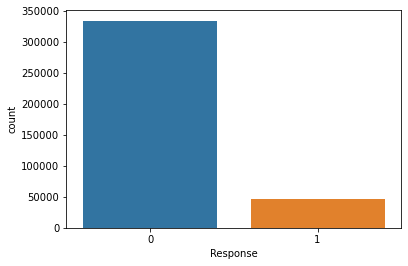

In [37]:
# Lets Analyse the number of people that will take this vehicle Insurance from The company
arr=HealthCrossSell["Response"].value_counts()

print("The Number of People That Are not Taking The Insurance From The Company Are: ",arr[0])
print("The Number of People That Are Taking The Insurance From The Company Are: ",arr[1])

sns.countplot(x=HealthCrossSell["Response"])

# From This we Can Say that most of the people that are in the dataset will not prefer to take the 
# Vehicle Insurnace From This Company 

The Number Of Males In The Insurance List:  206089
The Number Of Females In The Insurance List:  175020


<AxesSubplot:xlabel='Gender', ylabel='count'>

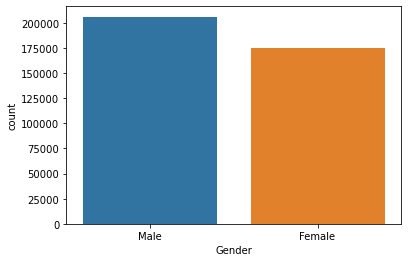

In [38]:
#Analysing The Amount Of Males And Females That are Currently Taken The Insurance

arr=HealthCrossSell["Gender"].value_counts()
print("The Number Of Males In The Insurance List: ",arr[0])
print("The Number Of Females In The Insurance List: ",arr[1])

sns.countplot(x=HealthCrossSell["Gender"])

# Males and Females have been distributed nearly fairly equally
# There is a difference of 30000 between the two of them 
# Also from this we can say that there is no bias in this attribute

The Number of People That Are Not Previously Insured Are:  206481
The Number of People That Are Previously Insured Are:  174628


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

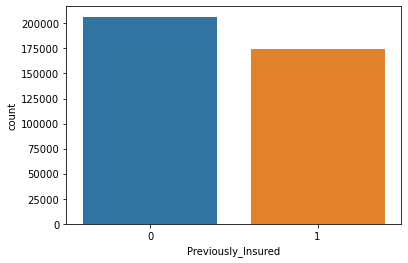

In [39]:
# Analysing the amount of people that have been previously insured from this company

arr=HealthCrossSell["Previously_Insured"].value_counts()
print("The Number of People That Are Not Previously Insured Are: ",arr[0])
print("The Number of People That Are Previously Insured Are: ",arr[1])
sns.countplot(x=HealthCrossSell["Previously_Insured"])

# This can be seen that There are nearly fairly Equal Proportion of the people that have 
# been previously insured and not previously insured as well looking at the dataset
# Although there is a gap between both of then (nearly 30000 )
# Also from this we can say that there is no bias in this attribute

Number Of Vehicles With Vehicle Age in 1 to 2 Years:  200316
Number Of Vehicles With Vehicle Age Lesser Than 1 Year:  164786
Number Of Vehicles With Vehicle Age Greater Than 2 Years:  16007


<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

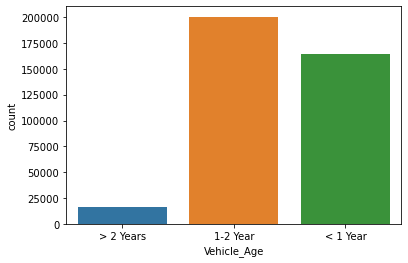

In [40]:
# Lets analyse the age of all the vehicles on whom the users will take an Insurance
arr=HealthCrossSell["Vehicle_Age"].value_counts()

print("Number Of Vehicles With Vehicle Age in 1 to 2 Years: ",arr[0])
print("Number Of Vehicles With Vehicle Age Lesser Than 1 Year: ",arr[1])
print("Number Of Vehicles With Vehicle Age Greater Than 2 Years: ",arr[2])

sns.countplot(x=HealthCrossSell["Vehicle_Age"])

# There are significantly less number of people that have age of vehicle greater than 2 Years\
# The Others are faily same we can say

In [41]:
# Lets analyse whats the mean age of the people who are taking the insurance
yes_insurance=[]
no_insurance=[]
count=0
for ele in HealthCrossSell["Response"]:
    if ele==0:
        yes_insurance.append(HealthCrossSell["Age"][count])
    else:
        no_insurance.append(HealthCrossSell["Age"][count])
    count+=1

print("The mean age of the people taking the insurance is : ",sum(yes_insurance)//len(yes_insurance))
print("The mean age of the people not taking the insurance is : ",sum(no_insurance)//len(no_insurance))

# From this we can analyse that there is quite a difference in the mean ages of the people that 
# want to take the insurance from the same company 

The mean age of the people taking the insurance is :  38
The mean age of the people not taking the insurance is :  43


Number of people continuing with buying vehicle Insurnace:  158
Number of people not continuing with buying vehicle Insurnace:  174470


<BarContainer object of 2 artists>

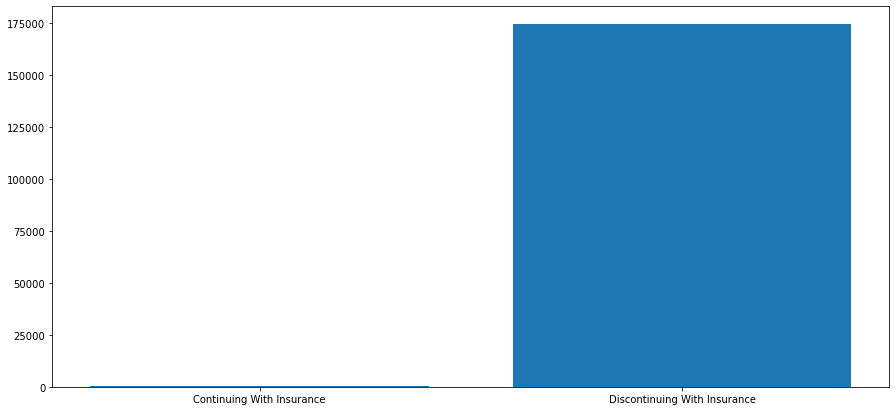

In [42]:
# Lets see how many people actually want to comtinue taking vehicle insurance from this company 
# as they have taken insurance of health from her only

yes,no,count=0,0,0

for ele in HealthCrossSell["Response"]:
    if ele==1 and HealthCrossSell["Previously_Insured"][count]==1:
        yes+=1
    elif ele==0 and HealthCrossSell["Previously_Insured"][count]==1:
        no+=1
    count+=1
print("Number of people continuing with buying vehicle Insurnace: ",yes)
print("Number of people not continuing with buying vehicle Insurnace: ",no)

arr1=["Continuing With Insurance","Discontinuing With Insurance"]
arr2=np.array([yes,no])
plt.figure(figsize=(15,7))
plt.bar(arr1,arr2)

# We can see that only a meagre number of people that is 158 are willing to take the vehicle insurance from the 
# same company from which they had taken the health insurance as well

Number of Males Taking Both the Insurnaces:  96
Number of Females Taking Both the Insurnaces:  62


<BarContainer object of 2 artists>

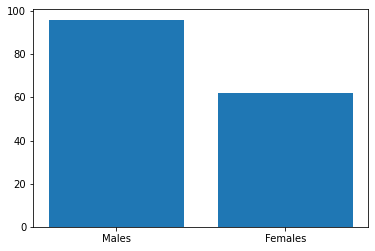

In [44]:
# Let us analyse gender of the people taking both the insurance health as well as vehicle
males,females,count=0,0,0

for ele in HealthCrossSell["Response"]:
    if ele==1 and HealthCrossSell["Previously_Insured"][count]==1 and HealthCrossSell["Gender"][count]=="Male":
        males+=1
    elif ele==1 and HealthCrossSell["Previously_Insured"][count]==1 and HealthCrossSell["Gender"][count]=="Female":
        females+=1
    count+=1
    
print("Number of Males Taking Both the Insurnaces: ",males)
print("Number of Females Taking Both the Insurnaces: ",females)

arr1=["Males","Females"]
arr2=np.array([males,females])
plt.figure(figsize=(6,4))
plt.bar(arr1,arr2)

# We can see that most of the people taking both the insurances are the males
# The number of females that are taking both in

In [47]:
# One of the main reasons why people are not taking the insurance maybe the 
# high annual premium the company charges on its insurance. So lets analyse that 
arr=[]
count=0
for ele in HealthCrossSell["Response"]:
    if ele==1:
        arr.append(HealthCrossSell["Annual_Premium"][count])
    count+=1
    
print("The Mean Annual Premium of that company insurance is: ",sum(arr)//len(arr))

print("The minimum annual premium of customer is : ",min(arr))
print("The maximum annual premium of customer is : ",max(arr))

# From this we can say that maybe most of the customers are not taking this 
# Insurance Due to The high annual premium

The Mean Annual Premium of that company insurance is:  31604
The minimum annual premium of customer is :  2630
The maximum annual premium of customer is :  540165
